In [201]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib import cm
import streamlit as st

In [202]:
##### Read Data CSV dan ubah ke data frame
csv = pd.read_csv("produksi_minyak_mentah.csv")
df = pd.DataFrame(csv)

kode_csv = list(df['kode_negara'].unique())
#print(f"kode_negara: {kode_csv}")

In [203]:
##### Read Data Json
with open ("kode_negara_lengkap.json") as f:
    file_json = json.load(f)
df2 = pd.DataFrame(file_json)

##### Mengambil value alpha-3 dan mengubahnya menjadi list
#kode_json = list(map(lambda kode_json: kode_json['alpha-3'], file_json))
kode_json = df2['alpha-3'].tolist()
#print(kode_json)

##### Mengambil value name dan mengubahnya menjadi list
#nama_negara = list(map(lambda nama_negara: nama_negara['name'], file_json))
nama_negara = df2['name'].tolist()
#print(nama_negara)

In [204]:
##### User inputs on the control panel
st.sidebar.subheader("Pengaturan konfigurasi tampilan")
list_kode=[]
for k in kode_csv:
    if k not in kode_json:
        continue
    list_kode.append(k)
#print(list_kode)

##### Menghilangkan yang bukan Negara
for v in kode_csv:
    if v in list_kode:
        continue
    df = df[df.kode_negara != v]
#print(df)

In [205]:
##### Membuat list nama-nama Negara
list_negara=[]
for i in file_json:
    if i['alpha-3'] not in list_kode:
        continue
    list_negara.append(i['name'])
#print(list_negara)

In [206]:
##### User input
negara = st.sidebar.selectbox("Pilih Negara", list_negara)
kode = df2[df2['name']==negara]['alpha-3'].tolist()[0]
n_tampil = st.sidebar.number_input("Jumlah baris dalam tabel yang ditampilkan", min_value=1, max_value=len(list_kode), value=10)

list_tahun = list(df['tahun'].unique())
tahun = st.sidebar.selectbox("Pilih Tahun", list_tahun)

In [207]:
# Mengubah string menjadi float pada data produksi
df['produksi'] = df['produksi'].astype(str).str.replace(".", "", regex=True).astype(float)
df['produksi'] = df['produksi'].astype(str).str.replace(",", "", regex=True).astype(float)
df['produksi'] = pd.to_numeric(df['produksi'], errors='coerce')
df

,kode_negara,tahun,produksi
0,AUS,1971,14226194.0
1,AUS,1972,15029094.0
2,AUS,1973,18720577.0
3,AUS,1974,18498696.0
4,AUS,1975,1973607.0
...,...,...,...
5834,ZWE,2011,0.0
5835,ZWE,2012,0.0
5836,ZWE,2013,0.0
5837,ZWE,2014,0.0


In [208]:
'''df = df.groupby(['kode_negara'], as_index=False).agg({'produksi':'sum'})
df'''

"df = df.groupby(['kode_negara'], as_index=False).agg({'produksi':'sum'})\ndf"

In [209]:
dfA = pd.DataFrame(df,columns= ['kode_negara','tahun','produksi'])
dfA=dfA.loc[dfA['kode_negara']=='AUS']
dfA['produksi'] = pd.to_numeric(dfA['produksi'], errors='coerce')
print(dfA)

   kode_negara  tahun    produksi
0          AUS   1971  14226194.0
1          AUS   1972  15029094.0
2          AUS   1973  18720577.0
3          AUS   1974  18498696.0
4          AUS   1975   1973607.0
5          AUS   1976  20177769.0
6          AUS   1977   2125931.0
7          AUS   1978  20694803.0
8          AUS   1979  20828964.0
9          AUS   1980  19471877.0
10         AUS   1981  19007475.0
11         AUS   1982  18706129.0
12         AUS   1983  18220054.0
13         AUS   1984  22148899.0
14         AUS   1985   2546886.0
15         AUS   1986  26561559.0
16         AUS   1987  26399764.0
17         AUS   1988  26322923.0
18         AUS   1989  23679705.0
19         AUS   1990  26752604.0
20         AUS   1991  26717935.0
21         AUS   1992  23439126.0
22         AUS   1993  22940108.0
23         AUS   1994  21286521.0
24         AUS   1995   2271844.0
25         AUS   1996   2053957.0
26         AUS   1997  20494396.0
27         AUS   1998  22008258.0
28         AUS

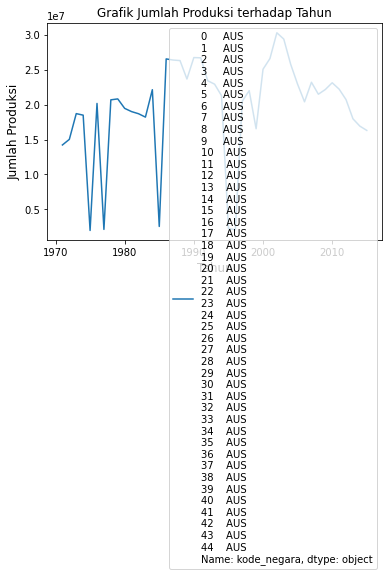

In [210]:
fig, ax = plt.subplots()
ax.plot(dfA['tahun'], dfA['produksi'], label = dfA['kode_negara'])
ax.set_title("Grafik Jumlah Produksi terhadap Tahun")
ax.set_xlabel("Tahun", fontsize = 12)
ax.set_ylabel("Jumlah Produksi", fontsize = 12)
ax.legend(fontsize = 10)
#plt.show

In [211]:
dfB = pd.DataFrame(df,columns= ['kode_negara','tahun','produksi'])
dfB = dfB.loc[dfB['tahun']==tahun]
dfB['produksi'] = pd.to_numeric(dfB['produksi'], errors='coerce')
dfB = dfB.sort_values(by='produksi', ascending = False)

Text(0, 0.5, 'Jumlah Produksi')

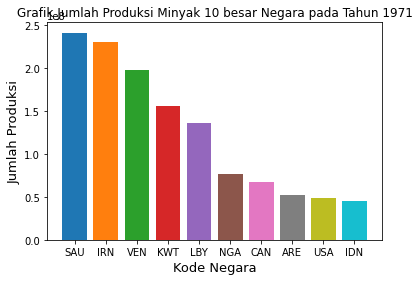

In [212]:
figB, ax = plt.subplots()
cmap = cm.get_cmap('tab10')
colors = cmap.colors[:len(list_negara)]
ax.bar(dfB['kode_negara'].head(n_tampil), dfB['produksi'].head(n_tampil) ,label=list_negara, color=colors)
ax.set_title(f'Grafik Jumlah Produksi Minyak {n_tampil} besar Negara pada Tahun {tahun}')
ax.set_xlabel("Kode Negara", fontsize=13)
ax.set_ylabel("Jumlah Produksi", fontsize=13)

In [222]:
total_produksi = []
for c in list_kode:
    produksi = df[df['kode_negara']==c]['produksi'].astype(float)
    total_produksi.append(produksi.sum())
print(f"Total produksi: {total_produksi}")

max_produksi = np.asarray(total_produksi).max()
max_produksi_idx = np.asarray(total_produksi).max()

Total produksi: [884595134.0, 51301535.0, 0.0, 3618726630.0, 4448493.0, 326734934.0, 0.0, 66997465.0, 163945430.0, 14693655.0, 54530173.0, 0.0, 0.0, 138818054.0, 17332699.0, 412028.0, 0.0, 4951418106.0, 87024580.0, 56909237.0, 3133738433.0, 20997091.0, 0.0, 2566285.0, 33867963.0, 124868.0, 0.0, 116453363.0, 3310952313.0, 13233864867.0, 472080.0, 2042144146.0, 317610809.0, 0.0, 512303049.0, 210463.0, 45828736.0, 0.0, 1982913348.0, 338216366.0, 4162849.0, 0.0, 31835859.0, 1902970602.0, 1056705282.0, 26582732.0, 0.0, 1472833037.0, 0.0, 0.0, 1974809.0, 24197563.0, 0.0, 0.0, 1149007187.0, 2521788111.0, 7921565838.0, 29348251.0, 1235659259.0, 0.0, 4251163.0, 0.0, 1069636771.0, 0.0, 76983.0, 377625.0, 3744855642.0, 90485017.0, 0.0, 234105956.0, 16217075.0, 313006523.0, 9989339389.0, 16955430171.0, 0.0, 19435.0, 7298304.0, 240442522.0, 3849210.0, 0.0, 161156956.0, 71780640.0, 3861736627.0, 0.0, 313168721.0, 0.0, 22805870.0, 0.0, 1519266956.0, 340164946.0, 2814766.0, 78733061.0, 0.0, 191054761.

In [223]:
dfC = pd.DataFrame(list(zip(list_kode, total_produksi)), columns=['kode_negara', 'total_produksi'])
dfC = dfC.sort_values(by=['total_produksi'], ascending=False)
print(dfC)

    kode_negara  total_produksi
73          SAU    1.695543e+10
29          USA    1.323386e+10
72          RUS    9.989339e+09
56          IRN    7.921566e+09
134         VEN    5.998416e+09
..          ...             ...
92          BWA    0.000000e+00
95          CRI    0.000000e+00
98          PRK    0.000000e+00
100         DOM    0.000000e+00
136         ZWE    0.000000e+00

[137 rows x 2 columns]


Text(0, 0.5, 'Jumlah Produksi Kumulatif')

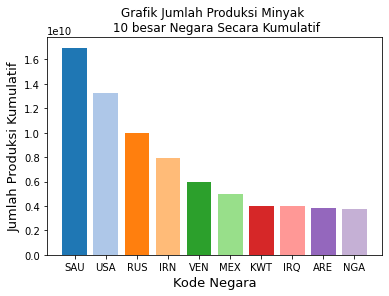

In [215]:
figC, ax = plt.subplots()
cmap = cm.get_cmap('tab20')
colors = cmap.colors[:len(list_negara)]
ax.bar(dfC['kode_negara'].head(n_tampil), dfC['total_produksi'].head(n_tampil), label=negara, color=colors)
ax.set_title(f'Grafik Jumlah Produksi Minyak \n {n_tampil} besar Negara Secara Kumulatif')
ax.set_xlabel("Kode Negara", fontsize=13)
ax.set_ylabel("Jumlah Produksi Kumulatif", fontsize=13)
#st.pyplot(figC)

In [ ]:
# D
#Bagian 1 (Produksi terbesar pada tahun T dan kumulatif)
##### Tahun T
jumlah_produksi = dfB[:1].iloc[0]['produksi']
kode_negara = dfB[:1].iloc[0]['kode_negara']
nama = []
region = []
subregion = []

for i in range(len(df2)):
    if list(df2['alpha-3'])[i]==kode_negara:
        nama = list(df2['name'])[i]
        region = list(df2['region'])[i]
        subregion = list(df2['sub-region'])[i]

In [ ]:
##### Kumulatif
jumlah_produksi = dfC[:1].iloc[0]['total_produksi']
kode_negara = dfC[:1].iloc[0]['kode_negara']
nama = []
region = []
subregion = []

for i in range(len(df2)):
    if list(df2['alpha-3'])[i]==kode_negara:
        nama = list(df2['name'])[i]
        region = list(df2['region'])[i]
        subregion = list(df2['sub-region'])[i]

In [ ]:
# Bagian 2 (Produksi Terkecil !=0 pada Tahun T dan Kumulatif)
##### Tahun T
dfkT = dfB[dfB.produksi !=0]
dfkT = dfkT.sort_values(by=['produksi'],ascending=True)
jumlah_produksi = dfkT[:1].iloc[0]['produksi']
kode_negara = dfkT[:1].iloc[0]['kode_negara']
nama = []
region = []
subregion = []
                                    
for i in range(len(df2)):
    if list(df2['alpha-3'])[i]==kode_negara:
        nama = list(df2['name'])[i]
        region = list(df2['region'])[i]
        subregion  = list(df2['sub-region'])[i]

In [ ]:
##### Kumulatif
dfk = dfC[dfC.total_produksi !=0]
dfk = dfk.sort_values(by=['total_produksi'],ascending=True)
jumlah_produksi = dfk[:1].iloc[0]['total_produksi']
kode_negara = dfk[:1].iloc[0]['kode_negara']
nama = []
region = []
subregion = []

for i in range(len(df2)):
    if list(df2['alpha-3'])[i]==kode_negara:
        nama = list(df2['name'])[i]
        region = list(df2['region'])[i]
        subregion = list(df2['sub-region'])[i]


In [ ]:
# Bagian 3 (Produksi = 0 pada Tahun T dan Kumulatif)
##### Tahun T
df0T = dfB[dfB.produksi ==0]
nama = []
region = []
subregion = []

for i in range(len(df0T)):
    for j in range(len(df2)):
        if list(df0T['kode_negara'])[i]==list(df2['alpha-3'])[j]:
            nama.append(list(df2['name'])[j])
            region.append(list(df2['region'])[j])
            subregion.append(list(df2['sub-region'])[j])

df0T ['Negara'] = nama
df0T ['Region'] = region
df0T ['Sub-Region'] = subregion

df0T = pd.DataFrame(df0T, columns=['Negara','kode_negara','Region','Sub-Region'])

In [ ]:
##### Kumulatif
df0K = dfC[dfC.total_produksi ==0]
nama = []
region = []
subregion = []

for i in range(len(df0K)):
    for j in range(len(df2)):
        if list(df0K['kode_negara'])[i]==list(df2['alpha-3'])[j]:
            nama.append(list(df2['name'])[j])
            region.append(list(df2['region'])[j])
            subregion.append(list(df2['sub-region'])[j])

df0K ['Negara'] = nama
df0K ['Region'] = region
df0K ['Sub-Region'] = subregion

df0K = pd.DataFrame(df0K, columns=['Negara','kode_negara','Region','Sub-Region'])